# Testing Notebook - Ambient Sound Classification

**Final Project B - EEL5840 Fall 2025**

This notebook loads the trained model and evaluates it on blind test data.

In [ ]:
TEST_DATA_PATH = 'test_data_projectB.npy'
TEST_LABELS_PATH = 'test_labels_projectB.npy'
MODEL_PATH = 'final_model.pkl'

In [1]:
import numpy as np
import librosa
import pickle
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Libraries loaded successfully")

Libraries loaded successfully


## Feature Extraction Function

In [2]:
def extract_advanced_audio_features(audio, sr=48000):
    """
    Extract 100 advanced audio features from a 5-second audio clip.
    Must match exactly the features used during training.
    """
    features = []
    
    rms = librosa.feature.rms(y=audio)[0]
    features.append(np.mean(rms))
    features.append(np.std(rms))
    
    zcr = librosa.feature.zero_crossing_rate(audio)[0]
    features.append(np.mean(zcr))
    features.append(np.std(zcr))
    
    centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)[0]
    features.append(np.mean(centroid))
    features.append(np.std(centroid))
    
    rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)[0]
    features.append(np.mean(rolloff))
    features.append(np.std(rolloff))
    
    bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)[0]
    features.append(np.mean(bandwidth))
    features.append(np.std(bandwidth))
    
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    for coef in mfccs:
        features.append(np.mean(coef))
        features.append(np.std(coef))
        features.append(np.max(coef))
        features.append(np.min(coef))
    
    delta_mfccs = librosa.feature.delta(mfccs)
    for coef in delta_mfccs:
        features.append(np.mean(coef))
    
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    for coef in chroma:
        features.append(np.mean(coef))
    
    contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    for coef in contrast:
        features.append(np.mean(coef))
    
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sr)
    for coef in tonnetz:
        features.append(np.mean(coef))
    
    return np.array(features)

## Testing Function

In [3]:
def test(data_path, labels_path, model_path='final_model.pkl', sample_rate=48000):
    """
    Test the trained model on blind test data.
    
    Parameters:
    -----------
    data_path : str
        Path to test data (.npy file, shape: [n_samples_per_clip, n_clips])
    labels_path : str
        Path to test labels (.npy file, shape: [n_clips])
    model_path : str
        Path to trained model (.pkl file)
    sample_rate : int
        Audio sample rate (default: 48000 Hz)
    
    Returns:
    --------
    predictions : np.array
        Predicted class labels (1-indexed: 1-5)
    f1_weighted : float
        Weighted F1-score
    """
    print("=" * 60)
    print("TESTING AMBIENT SOUND CLASSIFICATION MODEL")
    print("=" * 60)
    
    print("\n1. Loading model...")
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    print(f"   Model loaded from: {model_path}")
    
    print("\n2. Loading test data...")
    data_test = np.load(data_path)
    labels_test = np.load(labels_path)
    
    n_samples = data_test.shape[1]
    print(f"   Loaded {n_samples} test audio clips")
    
    print("\n3. Extracting features from test clips...")
    X_test = []
    for i in range(n_samples):
        if i % 50 == 0:
            print(f"   Processing clip {i}/{n_samples}...")
        
        audio = data_test[:, i]
        features = extract_advanced_audio_features(audio, sample_rate)
        X_test.append(features)
    
    X_test = np.array(X_test)
    t_test = labels_test.astype(int) - 1
    
    print(f"\n   Feature extraction complete!")
    print(f"   Feature matrix shape: {X_test.shape}")
    
    print("\n4. Making predictions...")
    y_pred_0indexed = model.predict(X_test)
    
    y_pred = y_pred_0indexed + 1
    
    print(f"   Predictions complete!")
    
    print("\n5. Evaluating performance...")
    accuracy = accuracy_score(t_test, y_pred_0indexed)
    f1_weighted = f1_score(t_test, y_pred_0indexed, average='weighted')
    
    print("\n" + "=" * 60)
    print("TEST RESULTS")
    print("=" * 60)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Weighted F1-score: {f1_weighted:.4f}")
    print("=" * 60)
    
    labels_names = ['Indoor Quiet', 'Street Traffic', 'Kitchen Activity',
                    'Human Chatter', 'Nature Sounds']
    
    print("\nPer-Class Performance:")
    print(classification_report(t_test, y_pred_0indexed, 
                                target_names=labels_names, digits=4))
    
    cm = confusion_matrix(t_test, y_pred_0indexed)
    disp = ConfusionMatrixDisplay(cm, display_labels=labels_names)
    fig, ax = plt.subplots(figsize=(10, 8))
    disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
    plt.title('Test Set Confusion Matrix', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    print("\n" + "=" * 60)
    print("TESTING COMPLETE!")
    print("=" * 60)
    
    return y_pred, f1_weighted

## Run Testing

TESTING AMBIENT SOUND CLASSIFICATION MODEL

1. Loading model...
   Model loaded from: final_model.pkl

2. Loading test data...


c:\Users\devin\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\devin\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.7.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\devin\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.7.2 when using version 1.5.1. This might lead to breaking code or invalid 

   Loaded 1210 test audio clips

3. Extracting features from test clips...
   Processing clip 0/1210...


c:\Users\devin\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\devin\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\devin\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


   Processing clip 50/1210...
   Processing clip 100/1210...
   Processing clip 150/1210...
   Processing clip 200/1210...
   Processing clip 250/1210...
   Processing clip 300/1210...
   Processing clip 350/1210...
   Processing clip 400/1210...


c:\Users\devin\anaconda3\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


   Processing clip 450/1210...
   Processing clip 500/1210...
   Processing clip 550/1210...
   Processing clip 600/1210...
   Processing clip 650/1210...
   Processing clip 700/1210...
   Processing clip 750/1210...
   Processing clip 800/1210...
   Processing clip 850/1210...
   Processing clip 900/1210...
   Processing clip 950/1210...
   Processing clip 1000/1210...
   Processing clip 1050/1210...
   Processing clip 1100/1210...
   Processing clip 1150/1210...
   Processing clip 1200/1210...

   Feature extraction complete!
   Feature matrix shape: (1210, 100)

4. Making predictions...
   Predictions complete!

5. Evaluating performance...

TEST RESULTS
Accuracy: 98.26%
Weighted F1-score: 0.9826

Per-Class Performance:
                  precision    recall  f1-score   support

    Indoor Quiet     0.9796    0.9796    0.9796       245
  Street Traffic     0.9877    0.9796    0.9836       245
Kitchen Activity     0.9839    0.9800    0.9820       250
   Human Chatter     0.9798    0.9

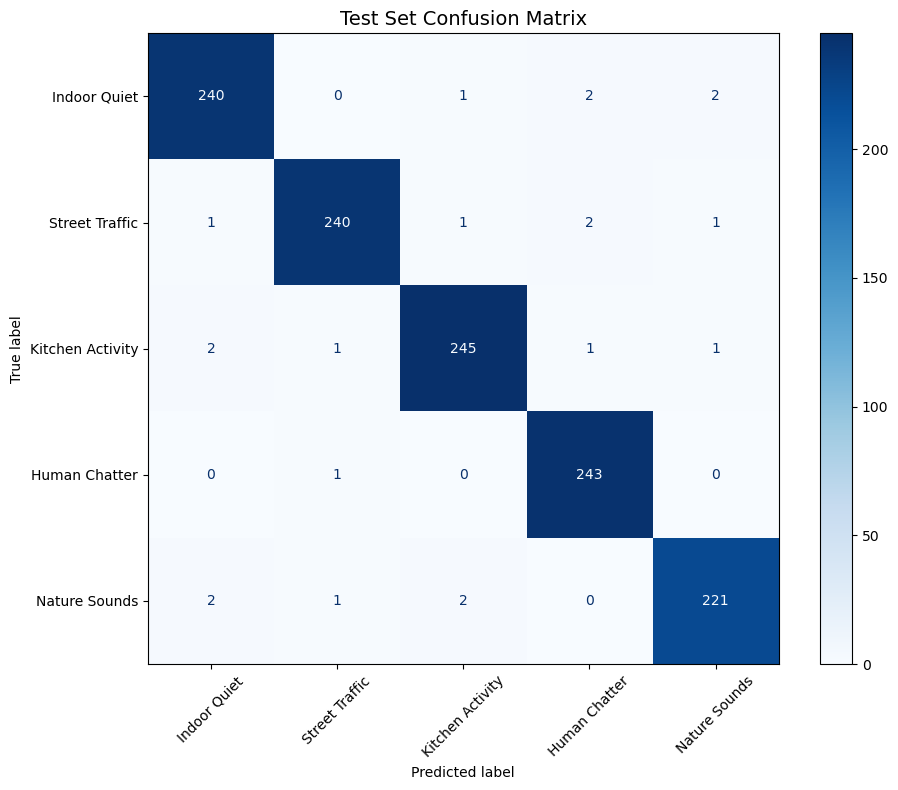


TESTING COMPLETE!

Predicted labels (1-indexed): [4 3 4 ... 4 3 5]
Final weighted F1-score: 0.9826


In [4]:
if __name__ == "__main__":
    predictions, f1_score = test(
        data_path=TEST_DATA_PATH,
        labels_path=TEST_LABELS_PATH,
        model_path=MODEL_PATH,
        sample_rate=48000
    )
    
    print(f"\nPredicted labels (1-indexed): {predictions}")
    print(f"Final weighted F1-score: {f1_score:.4f}")